# Исследование рынка общественного питания

Есть проект открытия небольшого кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Создатели проекта решили обратиться к инвесторам. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все "зеваки" насмотрятся на роботов-официантов?

Необходимо подготовить исследование рынка. В распоряжении имеются открытые данные о заведениях общественного питания в Москве.

## Загрузка и подготовка данных

Для начала загрузим необходимые библиотеки и файлы с данными.

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
from collections import Counter

In [2]:
# считываем файл с данными
data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# выводим основную информацию
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Сводка информации указывает на отсутствие в данных пропусков. Проверим также наличие дубликатов, перед этим приведя названия заведений к нижнему регистру (для учета возможных неявных повторов).

In [4]:
# приводим названия объектов к нижнему регистру
data['object_name'] = data['object_name'].str.lower()

In [5]:
# считаем число дубликатов
data.duplicated().sum()

0

Дубликатов также не было выявлено.

При этом мы видим, что столбец chain показывает принадлежность объекта к сетевым заведениям (да/нет), поэтому данные в нем могут быть представлены в логическом виде. Проведем соответствующие изменения.

In [6]:
# заменяем столбец chain на булевые значения
data['chain'] = (data['chain'] == 'да')

Проверим внесенные изменения.

In [7]:
# выводим основную информацию
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 615.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Тип данных был корректно изменен.

## Анализ данных

Для начала исследуем соотношение видов объектов общественного питания по количеству.

In [8]:
# группируем количество объектов по их типу
types_count = data.groupby('object_type').agg({'object_type': 'count'})

types_count

,object_type
object_type,
бар,856
буфет,585
закусочная,360
кафе,6099
кафетерий,398
магазин (отдел кулинарии),273
предприятие быстрого обслуживания,1923
ресторан,2285
столовая,2587


Для наглядности построим график.

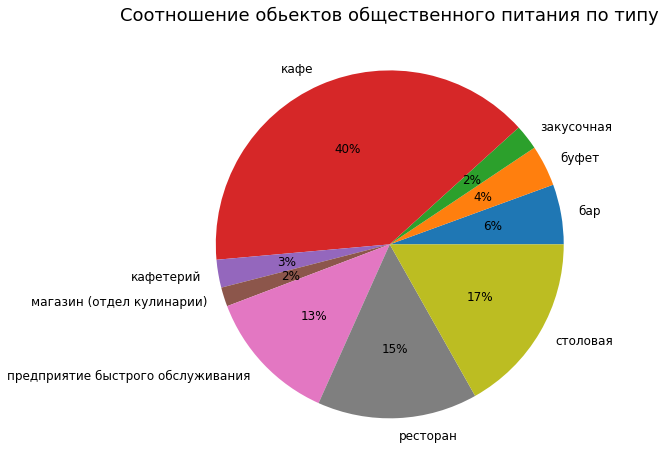

In [9]:
# строим круговую диаграмму
fig = plt.figure(figsize = (8, 8))
plt.pie(types_count['object_type'], labels=types_count.index, autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Соотношение обьектов общественного питания по типу', fontsize=18)
plt.show()

Вы видим, что кафе по численности занимают большую часть рынка (40%), далее следуют столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (13%).

Далее исследуем соотношение сетевых и несетевых заведений по количеству.

In [10]:
# группируем количество объектов по принадлежности к сетям
chains_count = data.groupby('chain').agg({'chain': 'count'})

chains_count

,chain
chain,
False,12398
True,2968


Также построим график.

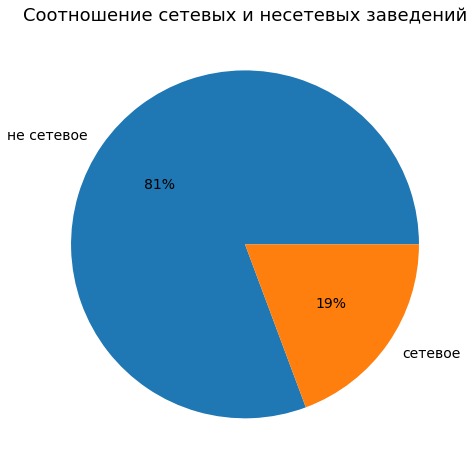

In [11]:
# строим круговую диаграмму
fig = plt.figure(figsize = (8, 8))
plt.pie(chains_count['chain'], labels=['не ceтевое', 'сетевое'], autopct='%.0f%%', textprops={'fontsize': 14})
plt.title('Соотношение сетевых и несетевых заведений', fontsize=18)
plt.show()

Большая часть заведений в Москве являются несетевыми. Посмотрим - для каких объектов более характерно сетевое распространение?

In [12]:
# группируем долю сетей по типу объектов с сортировкой
chains_mean = data.groupby('object_type').agg({'chain': 'mean'}).sort_values(by='chain', ascending=False).reset_index()

# для удобства выведем значения в процентах
chains_mean['chain'] = round(chains_mean['chain']*100, 1)
chains_mean.columns = ['тип заведения','доля сетей, %']

chains_mean

,тип заведения,"доля сетей, %"
0,предприятие быстрого обслуживания,41.1
1,магазин (отдел кулинарии),28.6
2,ресторан,23.8
3,кафе,22.9
4,закусочная,15.6
5,кафетерий,13.1
6,бар,4.3
7,буфет,1.9
8,столовая,0.1


Построим график.

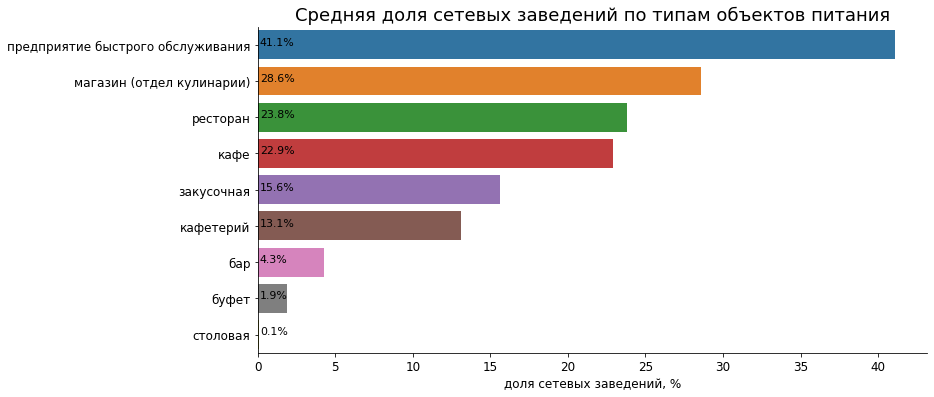

In [13]:
# строим столбчатую диаграмму
fig = plt.figure(figsize = (12, 6))
graph = sns.barplot(x='доля сетей, %', y='тип заведения', data=chains_mean)

for row in range(len(chains_mean)):
    graph.text(0.15, row, f"{round(chains_mean.loc[row , 'доля сетей, %'], 1)}%", fontsize=11)

sns.despine(bottom=False, left=False)
plt.xlabel('доля сетевых заведений, %', fontsize=12)
plt.ylabel('')
plt.title('Средняя доля сетевых заведений по типам объектов питания', fontsize=18)
plt.tick_params(labelsize=12)
plt.show()

Мы видим, что сети в первую очередь характерны для предприятий быстрого обслуживания (41%), магазинов (29%) и ресторанов (24%). Кафе также обладают долей сетей выше среднего - 23%.

Посмотрим - что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [14]:
# делаем срез по сетевым заведениям 
chains_only = data[data['chain'] == True]

# группируем медианное число мест и количество объектов по сетевым заведениям
chains_only_grouped = chains_only.groupby('object_name').agg({'number': 'median', 'object_name': 'count'})

chains_only_grouped

,number,object_name
object_name,,
beverly hills diner,88.0,1
bierloga,75.0,1
black & white,40.0,1
bocconcino,68.0,3
boobo,46.0,1
...,...,...
ямми микс,2.0,1
ян примус,300.0,1
японский ресторан «ваби-саби»,155.0,1


Мы видим, что даже в сетях присутствуют заведения всего с одним объектом питания. Возможно, это сети, где часть заведений была закрыта или находится в других населенных пунктах, либо же данные просто являются неполными. В любом случае, для построения наглядного распределения предлагается не учитывать подобные сетевые заведения.

In [15]:
# оставляем только "настоящие" сетевые заведения
chains_only_grouped = chains_only_grouped[chains_only_grouped['object_name'] > 1]

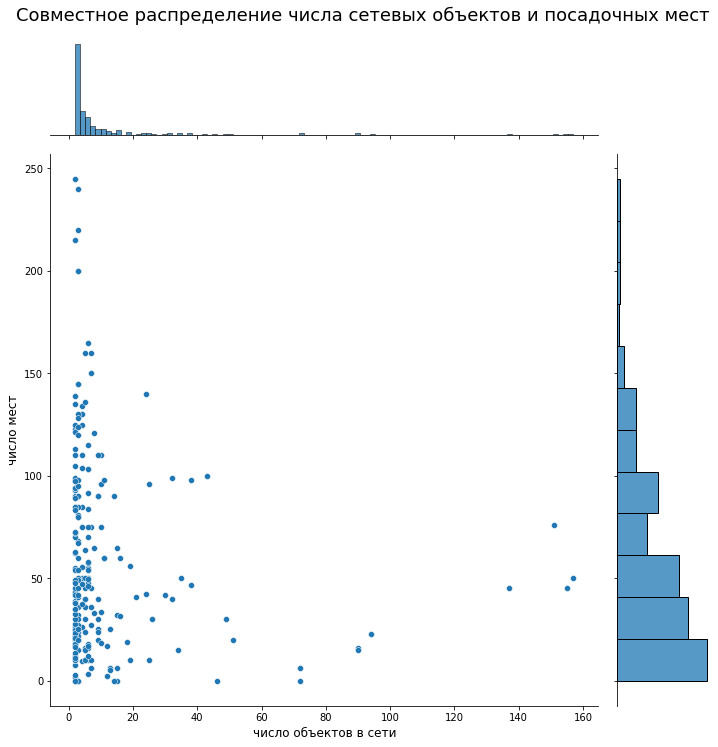

In [16]:
# строим объединенный график
graph = sns.jointplot(x='object_name', y='number', data=chains_only_grouped, height=10) 
graph.set_axis_labels('число объектов в сети', 'число мест', fontsize=12)
graph.fig.suptitle("Совместное распределение числа сетевых объектов и посадочных мест", y=1.03, fontsize=18)
plt.show()

Судя по графику, распределение вообще "тяготеет" к малому числу заведений с небольшим количеством мест - так, большинство сетевых заведений имеет не более 50-60 посадочных мест.

Посчитаем среднее количество посадочных мест по типам заведений общественного питания.

In [17]:
# группируем среднее число мест по типу объектов с сортировкой
seats_mean = data.groupby('object_type').agg({'number': 'mean'}).sort_values(by='number', ascending=False).reset_index()

seats_mean

,object_type,number
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,предприятие быстрого обслуживания,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


Построим график.

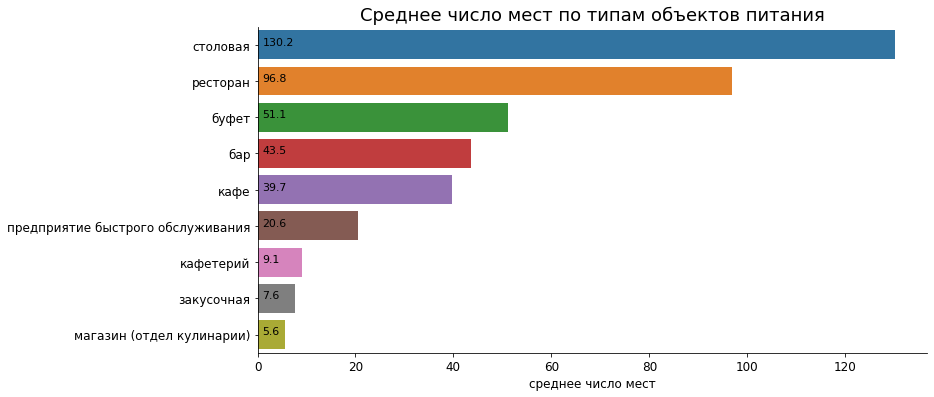

In [18]:
# строим столбчатую диаграмму
fig = plt.figure(figsize = (12, 6))
graph = sns.barplot(x='number', y='object_type', data=seats_mean)

for row in range(len(seats_mean)):
    graph.text(1, row, round(seats_mean.loc[row , 'number'], 1), fontsize=11)

sns.despine(bottom=False, left=False)
plt.xlabel('среднее число мест', fontsize=12)
plt.ylabel('')
plt.title('Среднее число мест по типам объектов питания', fontsize=18)
plt.tick_params(labelsize=12)
plt.show()

Наибольшим числом посадочных мест в среднем обладают столовые (130 ед.), рестораны (97 ед.) и буфеты (51 ед.). Кафе характеризуются средним значением в 40 посадочных мест.

Далее попробуем выделить информацию об улицах, на которых располагаются рассматриваемые объекты.

Более подробное ознакомление с данными позволяет сделать следующие предположения об адресах заведений: 
- части адреса записаны через запятую и могут содержать разное количество элементов;
- в адресах из двух частей название улицы записывается в первом элементе;
- в адресах из большего количества частей название улицы обычно записывается во второй элементе;
- однако есть адреса, где на втором месте указывается город (Зеленоград), название поселения или деревни в составе Москвы;
- адресами из предыдущего пункта представляется возможным "пожертвовать", так как они зачастую бывают неполными и вряд ли будут представлять основные центры спроса на объекты питания.

Исходя из вышесказанного, напишем функцию, которая будет выделять строчку с названием улицы из адреса, или помечать адрес как "неформатный" в принятых к исключению случаях.

In [19]:
# функция для выделения улицы из полного адреса объекта
def get_street(address):
    abc = address.split(",")
    if len(abc) == 2: 
        street = abc[0]
    elif not ('Зеленоград' in abc[1] or 'поселение' in abc[1] or 'деревня' in abc[1]):
        street = abc[1]
    else:
        street = 'non-format'
    return street.lstrip()

In [20]:
# применяем функцию к столбцу с адресами и записываем название улицы в отдельный столбец street
data['street'] = data['address'].apply(lambda x: get_street(x))

In [21]:
# выводим основную информацию
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   street       15366 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 735.4+ KB


,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


На первый взгляд, функция сработала как надо, однако не следует забывать о принятых исключениях.

In [22]:
# убираем "неформатные" адреса и улицы
data = data[data['street'] != 'non-format']

In [23]:
# выводим основную информацию
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14709 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14709 non-null  int64 
 1   object_name  14709 non-null  object
 2   chain        14709 non-null  bool  
 3   object_type  14709 non-null  object
 4   address      14709 non-null  object
 5   number       14709 non-null  int64 
 6   street       14709 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 818.8+ KB


,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


В ходе отсева было удалено 657 записей, что составляет не более 5% всех данных.

Посчитаем количество объектов общественного питания на каждой улице.

In [24]:
# группируем количество объектов по улицам с сортировкой
streets_count = data.groupby('street').agg({'object_type': 'count'}).sort_values(by='object_type', ascending=False).reset_index()

Посмотрим топ-10 улиц по количеству объектов.

In [25]:
# выбираем топ-10 улиц по числу объектов
streets_top = streets_count.head(10)

streets_top

,street,object_type
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Построим график. Используем другую цветовую гамму, чтобы по смыслу визуально отделить данный график от предыдущего.

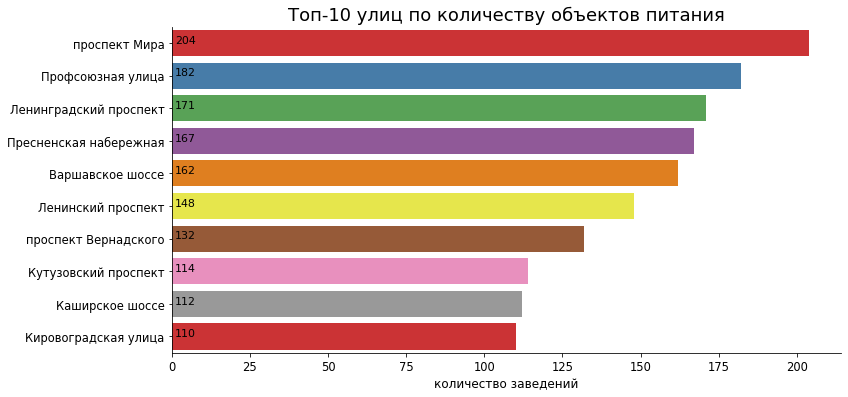

In [26]:
#cтроим столбчатую диаграмму
pal = sns.color_palette('Set1')
fig = plt.figure(figsize = (12, 6))
graph = sns.barplot(x='object_type', y='street', data=streets_top, palette=pal)

for row in range(len(streets_top)):
    graph.text(1, row, round(streets_top.loc[row , 'object_type'], 1), fontsize=11)

sns.despine(bottom=False, left=False)
plt.xlabel('количество заведений', fontsize=12)
plt.ylabel('')
plt.title('Топ-10 улиц по количеству объектов питания', fontsize=18)
plt.tick_params(labelsize=11.5)
plt.show()

Можно сказать, что объекты питания расположены преимущественно вдоль южных и юго-западных направлений движения по основным дорогам города. В целом такая картина представляется реалистичной, с учетом социально-экономического распределения населения Москвы.

Теперь найдем улицы только с одним объектом питания.

In [27]:
# выбираем улицы с одним объектом
streets_one = streets_count[streets_count['object_type'] == 1]

streets_one

,street,object_type
1298,2-я улица Энтузиастов,1
1299,улица Кутузова,1
1300,26-й километр Московской Кольцевой Автодороги,1
1301,Кучин переулок,1
1302,улица Кубинка,1
...,...,...
1858,Зюзинская улица,1
1859,улица Айвазовского,1
1860,Ащеулов переулок,1
1861,улица Академика Арцимовича,1


Для формирования лучшего представления о полученных данных целесообразно привязать улицы к районам города.

Для этого загрузим информацию из классификатора улиц Москвы с портала открытых данных.

In [28]:
# загружаем данные о московских улицах 
spreadsheet_id = '1zd9lTI186pr2rAEZoiFIYVeSmXttBZqeuSJtkKA4T_0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_streets = pd.read_csv(BytesIO(r.content), header=[1])
data_streets.head()

,Полное наименование,Сокращённое наименование,Код,Транслитерация,Код вида,Код ОМК ТМ,Код ОМК ТЕ,Код КЛАДР,global_id,UM_NAMEF_en,UM_NAMES_en,UM_CODE_en,UM_TRANS_en,UM_TYPE_en,UM_TM_en,UM_TE_en,UM_KLADR_en
0,1-й Ирининский переулок,1-й Ирининский пер.,8880,Pervy'j Irininskij pereulok,2,NaN,102,"7,7E+16",58481065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-й Ирининский переулок,2-й Ирининский пер.,8890,Vtoroj Irininskij pereulok,2,NaN,102,"7,7E+16",58481066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3-й Ирининский переулок,3-й Ирининский пер.,8891,Tretij Irininskij pereulok,2,NaN,102,"7,7E+16",58481067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Иркутская улица,Иркутская ул.,8910,Irkutskaya ulicza,1,NaN,406,"7,7E+16",58481068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-й Иртышский проезд,1-й Иртышский пр.,8920,Pervy'j Irty'shskij proezd,3,NaN,406,"7,7E+16",58481069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для удобства оставим только сведения о названии улиц и кодах территориальных единиц (для последующей привязки к районам). 

In [29]:
# выбираем необходимые столбцы и переименовываем их для дальнейшей работы
data_streets = data_streets[['Полное наименование', 'Код ОМК ТЕ']]
data_streets = data_streets.rename(columns={'Полное наименование': 'street', 'Код ОМК ТЕ': 'codes'})

data_streets.head()

,street,codes
0,1-й Ирининский переулок,102
1,2-й Ирининский переулок,102
2,3-й Ирининский переулок,102
3,Иркутская улица,406
4,1-й Иртышский проезд,406


Теперь объединим полученный ранее перечень топ-10 улиц с кодами районов.

In [30]:
# объединяем топ-10 улиц по числу объектов и таблицу с кодами районов
streets_top = streets_top.merge(data_streets, how='left', on='street')

streets_top 

,street,object_type,codes
0,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317
1,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712
2,Ленинградский проспект,171,0201;0202;0214;0217
3,Пресненская набережная,167,106
4,Варшавское шоссе,162,0610;0613;0615;0619;0620;0621;0708;0711;1111
5,Ленинский проспект,148,0110;0610;0702;0706;0707;0709;0814;0817
6,проспект Вернадского,132,0702;0706;0814;0815;0817
7,Кутузовский проспект,114,0805;0819
8,Каширское шоссе,112,0612;0613;0616;0617
9,Кировоградская улица,110,0619;0620;0621


Очевидно, что также необходима таблица соответствия кодов районов их названиям.

Аналогичным образом возьмем требуемые сведения с портала открытых данных.

In [31]:
# загружаем данные о районах города
spreadsheet_id = '1lKNHwNKhJtrFqCFPUYMOtwj9iM_BCk17zB5xTHYlgKw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_districts = pd.read_csv(BytesIO(r.content), header=[0])
data_districts.head()

,Kod,Name,global_id,Latin_name,Type,Kod_okato
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000
1,101,район Арбат,58703559,rajon Arbat,3,45286552
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565


Снова для удобства оставим только столбцы с кодом и названием района.

In [32]:
# выбираем необходимые столбцы и переименовываем их для дальнейшей работы
data_districts = data_districts[['Kod', 'Name']]
data_districts = data_districts.rename(columns={'Kod': 'code', 'Name': 'district'})

data_districts.head()

,code,district
0,100,Центральный административный округ
1,101,район Арбат
2,102,Басманный район
3,103,район Замоскворечье
4,104,Красносельский район


Поскольку одной улице из нашего перечня могут соответствовать несколько районов, напишем функцию, которая будет составлять список всех районов, относящихся к улице, на основе кодов территориальных единиц.

In [33]:
# функция для получения списков районов на основе кодов территориальных единиц
def get_district(codes, data):
    d = []
    abc = codes.split(";")
    for n in abc:
        d.append(data[data['code'] == int(n)]['district'].values[0])
    return d

In [34]:
# применяем функцию к столбцу с кодами и записываем список районов в отдельный столбец districts
streets_top['districts'] = streets_top['codes'].apply(lambda x: get_district(x, data_districts))

streets_top

,street,object_type,codes,districts
0,проспект Мира,204,0105;0301;0309;0310;0312;0313;0317,"[Мещанский район, Алексеевский район, район Ма..."
1,Профсоюзная улица,182,0701;0704;0707;0709;0710;0712,"[Академический район, район Коньково, Обручевс..."
2,Ленинградский проспект,171,0201;0202;0214;0217,"[район Аэропорт, район Беговой, район Сокол, Х..."
3,Пресненская набережная,167,106,[Пресненский район]
4,Варшавское шоссе,162,0610;0613;0615;0619;0620;0621;0708;0711;1111,"[Донской район, район Нагатино-Садовники, Наго..."
5,Ленинский проспект,148,0110;0610;0702;0706;0707;0709;0814;0817,"[район Якиманка, Донской район, Гагаринский ра..."
6,проспект Вернадского,132,0702;0706;0814;0815;0817,"[Гагаринский район, Ломоносовский район, район..."
7,Кутузовский проспект,114,0805;0819,"[район Дорогомилово, район Фили-Давыдково]"
8,Каширское шоссе,112,0612;0613;0616;0617,"[район Москворечье-Сабурово, район Нагатино-Са..."
9,Кировоградская улица,110,0619;0620;0621,"[район Чертаново Северное, район Чертаново Цен..."


Привязка к районам прошла успешно.

Теперь, получив общий список районов по "топовым" улицам, можно посчитать сколько раз в нем встречается каждый район. 

In [35]:
# считаем число повторений каждого района в общем списке
Counter(streets_top['districts'].sum()).most_common()

[('Обручевский район', 2),
 ('район Тёплый Стан', 2),
 ('Донской район', 2),
 ('район Нагатино-Садовники', 2),
 ('район Чертаново Северное', 2),
 ('район Чертаново Центральное', 2),
 ('район Чертаново Южное', 2),
 ('Гагаринский район', 2),
 ('Ломоносовский район', 2),
 ('район Проспект Вернадского', 2),
 ('район Тропарёво-Никулино', 2),
 ('Мещанский район', 1),
 ('Алексеевский район', 1),
 ('район Марьина Роща', 1),
 ('Останкинский район', 1),
 ('район Ростокино', 1),
 ('район Свиблово', 1),
 ('Ярославский район', 1),
 ('Академический район', 1),
 ('район Коньково', 1),
 ('район Черёмушки', 1),
 ('район Ясенево', 1),
 ('район Аэропорт', 1),
 ('район Беговой', 1),
 ('район Сокол', 1),
 ('Хорошёвский район', 1),
 ('Пресненский район', 1),
 ('Нагорный район', 1),
 ('район Северное Бутово', 1),
 ('район Южное Бутово', 1),
 ('поселение Щербинка', 1),
 ('район Якиманка', 1),
 ('район Раменки', 1),
 ('район Дорогомилово', 1),
 ('район Фили-Давыдково', 1),
 ('район Москворечье-Сабурово', 1),
 

Мы видим, что некоторые районы встречаются в списке дважды. Вероятно, их можно считать наиболее перспективными с точки зрения размещения заведений общественного питания.

Теперь применим аналогичные инструменты к перечню улиц только с одним объектом.

In [36]:
# объединяем улицы с одним объектом и таблицу с кодами районов
streets_one = streets_one.merge(data_streets, how='left', on='street')

# избавляемся от потенциальных пропусков, вызванных оставшимися артефактами в адресах
streets_one = streets_one.dropna()

streets_one

,street,object_type,codes
0,2-я улица Энтузиастов,1,413
1,улица Кутузова,1,809
2,улица Кутузова,1,1111
3,26-й километр Московской Кольцевой Автодороги,1,606
4,Кучин переулок,1,301
...,...,...,...
629,Зюзинская улица,1,710
630,улица Айвазовского,1,712
631,Ащеулов переулок,1,104
632,улица Академика Арцимовича,1,704


In [37]:
# применяем функцию для получения списков районов к столбцу с кодами и записываем список районов в отдельный столбец districts
streets_one['districts'] = streets_one['codes'].apply(lambda x: get_district(str(x), data_districts))

streets_one

,street,object_type,codes,districts
0,2-я улица Энтузиастов,1,413,[район Перово]
1,улица Кутузова,1,809,[Можайский район]
2,улица Кутузова,1,1111,[поселение Щербинка]
3,26-й километр Московской Кольцевой Автодороги,1,606,[район Бирюлёво Восточное]
4,Кучин переулок,1,301,[Алексеевский район]
...,...,...,...,...
629,Зюзинская улица,1,710,[район Черёмушки]
630,улица Айвазовского,1,712,[район Ясенево]
631,Ащеулов переулок,1,104,[Красносельский район]
632,улица Академика Арцимовича,1,704,[район Коньково]


In [38]:
# считаем число повторений каждого района в общем списке
Counter(streets_one['districts'].sum()).most_common(10)

[('Таганский район', 27),
 ('район Хамовники', 26),
 ('Басманный район', 25),
 ('Тверской район', 20),
 ('Пресненский район', 19),
 ('район Марьина Роща', 18),
 ('район Арбат', 17),
 ('Мещанский район', 16),
 ('район Сокольники', 15),
 ('район Замоскворечье', 14)]

Построим график. Для этого переведем полученный список в датафрейм.

In [39]:
# переводим список с подсчетом числа районов в датафрейм
districts_count = pd.DataFrame(Counter(streets_one['districts'].sum()).most_common(10))

districts_count

,0,1
0,Таганский район,27
1,район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
5,район Марьина Роща,18
6,район Арбат,17
7,Мещанский район,16
8,район Сокольники,15
9,район Замоскворечье,14


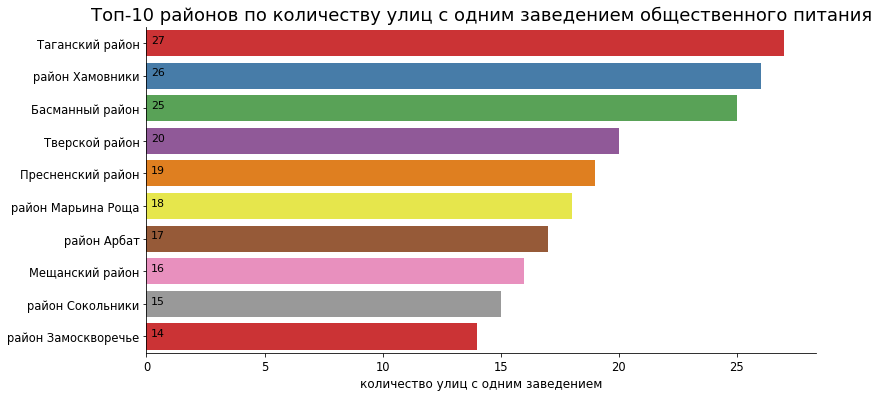

In [40]:
#cтроим столбчатую диаграмму
pal = sns.color_palette('Set1')
fig = plt.figure(figsize = (12, 6))
graph = sns.barplot(x=1, y=0, data=districts_count, palette=pal)

for row in range(len(streets_top)):
    graph.text(0.2, row, round(districts_count.loc[row , 1], 1), fontsize=11)

sns.despine(bottom=False, left=False)
plt.xlabel('количество улиц с одним заведением', fontsize=12)
plt.ylabel('')
plt.title('Топ-10 районов по количеству улиц с одним заведением общественного питания', fontsize=18)
plt.tick_params(labelsize=11.5)
plt.show()

Таким образом, мы видим районы с большим числом улиц, имеющих только одно заведения питания.

# Выводы

Был проведен анализ данных о заведениях общественного питания города Москвы с целью определения долгосрочного рыночного потенциала проекта открытия кафе с роботами-официантами. Исследование можно разделить на несколько основных блоков работ:
1. Предобработка данных:
- в ходе оценки данных не были выявлены пропуска или дубликаты;
- данные о принадлежности заведений к сетям были изменены на логический тип для использования в дальнейших вычислениях.

2. Исследовательский анализ данных и основные выводы:
- кафе - самый часто встречающийся тип заведений на рынке общественного питания (40% всех заведений), при этом большинство всех заведений (81%) также являются несетевыми;
- в связи с этим, проект открытия небольшого кафе с роботами обладает высоким потенциалом: с одной стороны, он попадает в наибольший сегмент рынка, с другой - имеет достаточно яркую индивидуальность для "перетягивания" клиентов данного сегмента;
- в перспективе кафе также может быть переведено в сетевой формат, что может обеспечить свежий приток клиентов в будущем (доля сетевых заведений среди кафе составляет 23%, что больше среднерыночной доли в 19%);
- в любом случае, предлагается начинать с небольшого заведения в 30-40 мест, по аналогии с типичными рыночными практиками;
- значимый объем рыночного сегмента, небольшой размер заведения и потенциал развития сети обеспечат долгосрочный спрос и успех проекта.

3. Дополнительный анализ и рекомендации:
- в ходе анализа также была произведена привязка существующих объектов питания к улицам и районам города с целью определения зон потенциального размещения кафе
- по итогам можно рекомендовать юго-западные района города для открытия заведения, так как через них проходит несколько крупных магистралей, на каждой из которых расположено более 100 объектов питания.